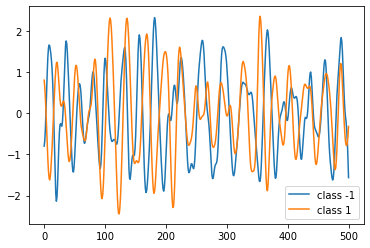

In [1]:
##https://keras.io/examples/timeseries/timeseries_classification_from_scratch/#plot-the-models-training-and-validation-loss


from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [2]:
## normalize input data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

num_classes = len(np.unique(y_train))

idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [3]:
## Build model CNN1D
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

2022-09-05 15:48:06.711006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-05 15:48:06.711191: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [4]:
## Trainning model CNN1D

epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500


2022-09-05 15:48:20.565990: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-05 15:48:20.907039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


89/90 [============================>.] - ETA: 0s - loss: 0.5809 - sparse_categorical_accuracy: 0.6893

2022-09-05 15:48:24.737701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 4s 14ms/step - loss: 0.5805 - sparse_categorical_accuracy: 0.6892 - val_loss: 0.8644 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 2/500
90/90 [==============================] - 1s 12ms/step - loss: 0.4585 - sparse_categorical_accuracy: 0.7806 - val_loss: 0.8457 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 3/500
90/90 [==============================] - 1s 11ms/step - loss: 0.4312 - sparse_categorical_accuracy: 0.7872 - val_loss: 0.8568 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 4/500
90/90 [==============================] - 1s 12ms/step - loss: 0.4058 - sparse_categorical_accuracy: 0.7979 - val_loss: 0.7012 - val_sparse_categorical_accuracy: 0.5270 - lr: 0.0010
Epoch 5/500
90/90 [==============================] - 1s 11ms/step - loss: 0.4177 - sparse_categorical_accuracy: 0.7892 - val_loss: 0.7522 - val_sparse_categorical_accuracy: 0.5548 - lr: 0.0010
Epoch 6/500
90/90 [============================

90/90 [==============================] - 1s 11ms/step - loss: 0.2481 - sparse_categorical_accuracy: 0.8941 - val_loss: 0.2822 - val_sparse_categorical_accuracy: 0.8863 - lr: 0.0010
Epoch 44/500
90/90 [==============================] - 1s 11ms/step - loss: 0.2401 - sparse_categorical_accuracy: 0.8955 - val_loss: 0.2631 - val_sparse_categorical_accuracy: 0.8863 - lr: 0.0010
Epoch 45/500
90/90 [==============================] - 1s 11ms/step - loss: 0.2593 - sparse_categorical_accuracy: 0.8872 - val_loss: 0.7663 - val_sparse_categorical_accuracy: 0.6768 - lr: 0.0010
Epoch 46/500
90/90 [==============================] - 1s 11ms/step - loss: 0.2437 - sparse_categorical_accuracy: 0.8993 - val_loss: 0.3538 - val_sparse_categorical_accuracy: 0.8377 - lr: 0.0010
Epoch 47/500
90/90 [==============================] - 1s 11ms/step - loss: 0.2269 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.4047 - val_sparse_categorical_accuracy: 0.7850 - lr: 0.0010
Epoch 48/500
90/90 [=======================

90/90 [==============================] - 1s 11ms/step - loss: 0.1024 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.1664 - val_sparse_categorical_accuracy: 0.9334 - lr: 0.0010
Epoch 86/500
90/90 [==============================] - 1s 11ms/step - loss: 0.1009 - sparse_categorical_accuracy: 0.9674 - val_loss: 0.1495 - val_sparse_categorical_accuracy: 0.9473 - lr: 0.0010
Epoch 87/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0963 - sparse_categorical_accuracy: 0.9694 - val_loss: 0.7068 - val_sparse_categorical_accuracy: 0.7503 - lr: 0.0010
Epoch 88/500
90/90 [==============================] - 1s 11ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9583 - val_loss: 1.5325 - val_sparse_categorical_accuracy: 0.5576 - lr: 0.0010
Epoch 89/500
90/90 [==============================] - 1s 11ms/step - loss: 0.1033 - sparse_categorical_accuracy: 0.9639 - val_loss: 0.1404 - val_sparse_categorical_accuracy: 0.9473 - lr: 0.0010
Epoch 90/500
90/90 [=======================

90/90 [==============================] - 1s 11ms/step - loss: 0.0820 - sparse_categorical_accuracy: 0.9740 - val_loss: 0.5518 - val_sparse_categorical_accuracy: 0.7850 - lr: 0.0010
Epoch 128/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0799 - sparse_categorical_accuracy: 0.9719 - val_loss: 0.1150 - val_sparse_categorical_accuracy: 0.9570 - lr: 0.0010
Epoch 129/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0805 - sparse_categorical_accuracy: 0.9726 - val_loss: 0.3529 - val_sparse_categorical_accuracy: 0.8738 - lr: 0.0010
Epoch 130/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0878 - sparse_categorical_accuracy: 0.9712 - val_loss: 0.1414 - val_sparse_categorical_accuracy: 0.9501 - lr: 0.0010
Epoch 131/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0871 - sparse_categorical_accuracy: 0.9694 - val_loss: 0.8604 - val_sparse_categorical_accuracy: 0.7365 - lr: 0.0010
Epoch 132/500
90/90 [==================

90/90 [==============================] - 1s 11ms/step - loss: 0.0664 - sparse_categorical_accuracy: 0.9767 - val_loss: 0.1004 - val_sparse_categorical_accuracy: 0.9584 - lr: 5.0000e-04
Epoch 169/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.1173 - val_sparse_categorical_accuracy: 0.9626 - lr: 5.0000e-04
Epoch 170/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0651 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.1306 - val_sparse_categorical_accuracy: 0.9570 - lr: 5.0000e-04
Epoch 171/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0658 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.1334 - val_sparse_categorical_accuracy: 0.9459 - lr: 5.0000e-04
Epoch 172/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.1143 - val_sparse_categorical_accuracy: 0.9612 - lr: 5.0000e-04
Epoch 173/500
90/90

90/90 [==============================] - 1s 11ms/step - loss: 0.0516 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0949 - val_sparse_categorical_accuracy: 0.9639 - lr: 2.5000e-04
Epoch 210/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0515 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0951 - val_sparse_categorical_accuracy: 0.9653 - lr: 2.5000e-04
Epoch 211/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0515 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0953 - val_sparse_categorical_accuracy: 0.9653 - lr: 2.5000e-04
Epoch 212/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0468 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.0977 - val_sparse_categorical_accuracy: 0.9626 - lr: 2.5000e-04
Epoch 213/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.1186 - val_sparse_categorical_accuracy: 0.9556 - lr: 2.5000e-04
Epoch 214/500
90/90

90/90 [==============================] - 1s 11ms/step - loss: 0.0435 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.1352 - val_sparse_categorical_accuracy: 0.9528 - lr: 1.2500e-04
Epoch 251/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0447 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0997 - val_sparse_categorical_accuracy: 0.9653 - lr: 1.2500e-04
Epoch 252/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0478 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.1091 - val_sparse_categorical_accuracy: 0.9584 - lr: 1.2500e-04
Epoch 253/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0391 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.1097 - val_sparse_categorical_accuracy: 0.9570 - lr: 1.2500e-04
Epoch 254/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0926 - val_sparse_categorical_accuracy: 0.9612 - lr: 1.2500e-04
Epoch 255/500
90/90

90/90 [==============================] - 1s 11ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0935 - val_sparse_categorical_accuracy: 0.9653 - lr: 1.0000e-04
Epoch 292/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0361 - sparse_categorical_accuracy: 0.9892 - val_loss: 0.0973 - val_sparse_categorical_accuracy: 0.9653 - lr: 1.0000e-04
Epoch 293/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9892 - val_loss: 0.1117 - val_sparse_categorical_accuracy: 0.9584 - lr: 1.0000e-04
Epoch 294/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0398 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.0975 - val_sparse_categorical_accuracy: 0.9626 - lr: 1.0000e-04
Epoch 295/500
90/90 [==============================] - 1s 11ms/step - loss: 0.0390 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.0983 - val_sparse_categorical_accuracy: 0.9639 - lr: 1.0000e-04
Epoch 296/500
90/90

90/90 [==============================] - 1s 11ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.0957 - val_sparse_categorical_accuracy: 0.9639 - lr: 1.0000e-04
Epoch 332: early stopping


In [5]:
##Evaluate model on test data
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

16/42 [==========>...................] - ETA: 0s - loss: 0.0818 - sparse_categorical_accuracy: 0.9668

2022-09-05 17:07:37.508309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - 0s 6ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9682
Test accuracy 0.968181848526001
Test loss 0.08903876692056656


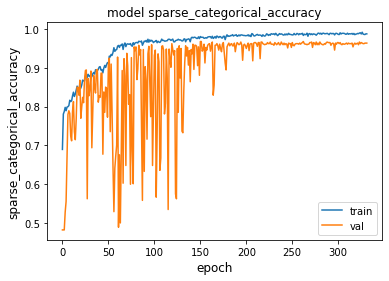

In [6]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()